40 tipos de insectos

In [345]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import numpy as np
import math, re, os,random,shutil
import matplotlib.pyplot as plt
import warnings
import glob
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd
from collections import defaultdict


In [30]:

def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

set_seed()

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

warnings.filterwarnings('ignore')

In [183]:
species_folders = {
    'Dolycoris baccarum (Linnaeus)': 'carpetas/Dolycoris baccarum (Linnaeus)',
    'Lycorma delicatula (White)': 'carpetas/Lycorma delicatula (White)',
    'Eurydema dominulus (Scopoli)': 'carpetas/Eurydema dominulus (Scopoli)',
    'Pieris rapae (Linnaeus)':'carpetas/Pieris rapae (Linnaeus)',
    'Halyomorpha halys (Stål)':'carpetas/Halyomorpha halys (Stål)',
    'Spilosoma obliqua (Walker)':'carpetas/Spilosoma obliqua (Walker)',
    'Graphosoma rubrolineata (Westwood)':'carpetas/Graphosoma rubrolineata (Westwood)',
    'Luperomorpha suturalis (Chen)':'carpetas/Luperomorpha suturalis Chen',
    'Leptocorisa acuta (Thunberg)':'carpetas/Leptocorisa acuta (Thunberg)',
    'Sesamia inferens (Walker)':'carpetas/Sesamia inferens (Walker)',
    'Cicadella viridis (Linnaeus)':'carpetas/Cicadella viridis (Linnaeus)',
    'Callitettix versicolor (Fabricius)':'carpetas/Callitettix versicolor (Fabricius)',
    'Scotinophara lurida (Burmeister)':'carpetas/Scotinophara lurida (Burmeister)',
    'Cletus punctiger (Dallas)':'carpetas/Cletus punctiger (Dallas)',
    'Nezara viridula (Linnaeus)':'carpetas/Nezara viridula (Linnaeus)',
    'Dicladispa armigera (Olivier)':'carpetas/Dicladispa armigera (Olivier)',
    'Riptortus pedestris (Fabricius)':'carpetas/Riptortus pedestris (Fabricius)',
    'Maruca testulalis (Gryer)':'carpetas/Maruca testulalis Gryer',
    'Chauliops fallax (Scott)':'carpetas/Chauliops fallax Scott',
    'Chilo supperssalis (Walker)':'carpetas/Chilo supperssalis (Walker)',
    'Stollia ventralis (Westwood)':'carpetas/Stollia ventralis (Westwood)',
    'Nilaparvata lugens (Stål)':'carpetas/Nilaparvata lugens (Stål)',
    'Diostrombus politus (Uhler)':'carpetas/Diostrombus politus Uhler',
    'Phyllotreta striolata (Fabricius)':'carpetas/Phyllotreta striolata (Fabricius)',
    'Aulacophora indica (Gmelin)':'carpetas/Aulacophora indica (Gmelin)',
    'Laodelphax striatellus (Fallén)':'carpetas/Laodelphax striatellus (Fallén)',
    'Ceroplastes ceriferus (Anderson)':'carpetas/Ceroplastes ceriferus (Anderson)',
    'Corythucha marmorata(Uhler)':'carpetas/Corythucha marmorata(Uhler)',
    'Dryocosmus Kuriphilus (Yasumatsu)':'carpetas/Dryocosmus KuriphilusYasumatsu',
    'Porthesia taiwana (Shiraki)':'carpetas/Porthesia taiwana Shiraki',
    'Chromatomyia horticola(Goureau)':'carpetas/Chromatomyia horticola(Goureau)',
    'Iscadia inexacta (Walker, 1858)':'carpetas/Iscadia inexacta (Walker, 1858)',
    'Plutella xylostella (Linnaeus)':'carpetas/Plutella xylostella (Linnaeus)',
    'Empoasca flavescens (Fabricius)':'carpetas/Empoasca flavescens (Fabricius)',
    'Dolerus tritici (Chu)':'carpetas/Dolerus tritici Chu',
    'Spodoptera litura (Fabricius)':'carpetas/Spodoptera litura (Fabricius)',
    'Corythucha ciliata (Say)':'carpetas/Corythucha ciliata (Say)',
    'Bemisia tabaci (Gennadius)':'carpetas/Bemisia tabaci (Gennadius)',
    'Ceutorhynchus asper (Roelofs)':'carpetas/Ceutorhynchus asper Roelofs',
    'Strongyllodes variegatus (Fairmaire)':'carpetas/Strongyllodes variegatus (Fairmaire)',
}
CLASSES = list(species_folders.keys())

df_labels = {
    'Dolycoris baccarum (Linnaeus)': 0,
    'Lycorma delicatula (White)': 1,
    'Eurydema dominulus (Scopoli)': 2,
    'Pieris rapae (Linnaeus)':3,
    'Halyomorpha halys (Stål)':4,
    'Spilosoma obliqua (Walker)':5,
    'Graphosoma rubrolineata (Westwood)':6,
    'Luperomorpha suturalis (Chen)':7,
    'Leptocorisa acuta (Thunberg)':8,
    'Sesamia inferens (Walker)':9,
    'Cicadella viridis (Linnaeus)':10,
    'Callitettix versicolor (Fabricius)':11,
    'Scotinophara lurida (Burmeister)':12,
    'Cletus punctiger (Dallas)':13,
    'Nezara viridula (Linnaeus)':14,
    'Dicladispa armigera (Olivier)':15,
    'Riptortus pedestris (Fabricius)':16,
    'Maruca testulalis (Gryer)':17,
    'Chauliops fallax (Scott)':18,
    'Chilo supperssalis (Walker)':19,
    'Stollia ventralis (Westwood)':20,
    'Nilaparvata lugens (Stål)':21,
    'Diostrombus politus (Uhler)':22,
    'Phyllotreta striolata (Fabricius)':23,
    'Aulacophora indica (Gmelin)':24,
    'Laodelphax striatellus (Fallén)':25,
    'Ceroplastes ceriferus (Anderson)':26,
    'Corythucha marmorata(Uhler)':27,
    'Dryocosmus Kuriphilus (Yasumatsu)':28,
    'Porthesia taiwana (Shiraki)':29,
    'Chromatomyia horticola(Goureau)':30,
    'Iscadia inexacta (Walker, 1858)':31,
    'Plutella xylostella (Linnaeus)':32,
    'Empoasca flavescens (Fabricius)':33,
    'Dolerus tritici (Chu)':34,
    'Spodoptera litura (Fabricius)':35,
    'Corythucha ciliata (Say)':36,
    'Bemisia tabaci (Gennadius)':37,
    'Ceutorhynchus asper (Roelofs)':38,
    'Strongyllodes variegatus (Fairmaire)':39,
}

In [184]:

dataset = []
image_paths = []
labels = []


In [185]:
for species_name, folder_path in species_folders.items():
    # Obtener las rutas de archivo de las imágenes en la carpeta
    species_images = glob.glob(folder_path + '/*.jpg')  # Ajusta la extensión según tus imágenes
    
    # Agregar las rutas de archivo y las etiquetas correspondientes a las listas
    image_paths.extend(species_images)
    labels.extend([species_name] * len(species_images))
    
    # Agregar las imágenes y las etiquetas a la lista de datasets
    dataset.extend(list(zip(species_images, [species_name] * len(species_images))))

In [186]:
for image_path, label in dataset:
    print(image_path, label)

carpetas/Dolycoris baccarum (Linnaeus)/003_4010.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/003_4013.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/DSC_2700.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/003_4018.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/DSC_2701.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/DSC_2697.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/AAA_1782_IJFR.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/DSC_7258_IJFR.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/003_4009.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/DSC_2690.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/AAA_1781_IJFR.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/DSC_2695.jpg Dolycoris baccarum (Linnaeus)
c

In [318]:
def load_and_preprocess_image(image_path):
    # Leer la imagen desde el archivo
    image = tf.io.read_file(image_path)
    # Decodificar la imagen en un tensor
    image = tf.image.decode_jpeg(image, channels=3)
    # Redimensionar la imagen a un tamaño fijo
    image = tf.image.resize(image, (224, 224))
    # Normalizar los valores de píxeles en el rango [0, 1]
    image = image / 255.0
    
    return image

In [188]:

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)


In [284]:
BATCH_SIZE = 128
IMG_SIZE = (224, 224)

# Create the combined dataset from the directory
dataset = tf.keras.utils.image_dataset_from_directory(
    'carpetas',
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)   

# Extract class names from the dataset directory
class_names = dataset.class_names

# Split the dataset into training and validation sets
train_dataset = dataset.take(int(0.8 * len(dataset))) ## coge los 80 primeros
val_dataset = dataset.skip(int(0.8 * len(dataset))) ##coge lo que queda quitando los 80 primeros




Found 4508 files belonging to 40 classes.


In [286]:
directorio = 'carpetas'

clases = os.listdir(directorio) #lista con las carpetas de los directorios

In [288]:
train_data = []
val_data = []
test_data = []

In [346]:
for clase in clases:
    clase_dir = os.path.join(directorio, clase)
    archivos = os.listdir(clase_dir)
    random.shuffle(archivos)  # Mezclar aleatoriamente los archivos de la clase

    # Calcular los tamaños de los conjuntos de entrenamiento, validación y prueba
    total_archivos = len(archivos)
    train_size = int(0.7 * total_archivos)
    val_size = int(0.3 * total_archivos * 0.7)
    test_size = total_archivos - train_size - val_size

    # Dividir los archivos en los conjuntos correspondientes
    train_files = archivos[:train_size] #coger hasta train size
    val_files = archivos[train_size:train_size + val_size] #desde train hasta valsize
    test_files = archivos[train_size + val_size:] #test

    # Crear las rutas completas a los archivos de cada conjunto
    train_files = [os.path.join(clase_dir, archivo) for archivo in train_files]  #ruta imagenes en
    val_files = [os.path.join(clase_dir, archivo) for archivo in val_files]
    test_files = [os.path.join(clase_dir, archivo) for archivo in test_files]

    # Agregar los archivos de cada conjunto a las listas finales
    train_data.extend(train_files) #lista de imagen en cada fase
    val_data.extend(val_files)
    test_data.extend(test_files)

In [310]:
print(train_data)

['carpetas/Diostrombus politus Uhler/23.jpg', 'carpetas/Diostrombus politus Uhler/004_7720.jpg', 'carpetas/Diostrombus politus Uhler/4.jpg', 'carpetas/Diostrombus politus Uhler/1.jpg', 'carpetas/Diostrombus politus Uhler/004_5912.jpg', 'carpetas/Diostrombus politus Uhler/004_7721.jpg', 'carpetas/Diostrombus politus Uhler/DSC_3768.jpg', 'carpetas/Diostrombus politus Uhler/004_6071.jpg', 'carpetas/Diostrombus politus Uhler/004_5923.jpg', 'carpetas/Diostrombus politus Uhler/DSC_3771.jpg', 'carpetas/Diostrombus politus Uhler/004_5924.jpg', 'carpetas/Diostrombus politus Uhler/DSC_4605_IJFR.jpg', 'carpetas/Diostrombus politus Uhler/004_6021.jpg', 'carpetas/Diostrombus politus Uhler/004_6018.jpg', 'carpetas/Diostrombus politus Uhler/004_6024.jpg', 'carpetas/Diostrombus politus Uhler/004_5965.jpg', 'carpetas/Diostrombus politus Uhler/20150705D-007_5280_IJFR.jpg', 'carpetas/Diostrombus politus Uhler/004_5969.jpg', 'carpetas/Diostrombus politus Uhler/004_5917.jpg', 'carpetas/Diostrombus politus 

In [355]:
destination_dir = "directorios"

# Crear subdirectorios para train, val y test
train_dir = os.path.join(destination_dir, "train")
val_dir = os.path.join(destination_dir, "val")
test_dir = os.path.join(destination_dir, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


In [358]:
# Copiar imágenes a las subcarpetas de clase dentro de la carpeta 'train'
for image_path in train_data:
    # Obtener el nombre de la clase basado en el nombre de la carpeta
    class_name = os.path.basename(os.path.dirname(image_path))

    # Crear la subcarpeta de clase si no existe
    class_dir = os.path.join(train_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)

    # Copiar la imagen a la subcarpeta de clase
    filename = os.path.basename(image_path)
    destination_path = os.path.join(class_dir, filename)
    shutil.copy2(image_path, destination_path)

In [359]:
# Copiar imágenes a las subcarpetas de clase dentro de la carpeta 'train'
for image_path in val_data:
    # Obtener el nombre de la clase basado en el nombre de la carpeta
    class_name = os.path.basename(os.path.dirname(image_path))

    # Crear la subcarpeta de clase si no existe
    class_dir = os.path.join(val_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)

    # Copiar la imagen a la subcarpeta de clase
    filename = os.path.basename(image_path)
    destination_path = os.path.join(class_dir, filename)
    shutil.copy2(image_path, destination_path)

In [350]:
# Copiar imágenes a las subcarpetas de clase dentro de la carpeta 'train'
for image_path in test_data:
    # Obtener el nombre de la clase basado en el nombre de la carpeta
    class_name = os.path.basename(os.path.dirname(image_path))

    # Crear la subcarpeta de clase si no existe
    class_dir = os.path.join(test_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)

    # Copiar la imagen a la subcarpeta de clase
    filename = os.path.basename(image_path)
    destination_path = os.path.join(class_dir, filename)
    shutil.copy2(image_path, destination_path)

In [354]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    '/home/angel/1/insectos/directorios/train',
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

Found 0 files belonging to 0 classes.


ValueError: No images found in directory /home/angel/1/insectos/directorios/train. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [ ]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    'directorios/val',
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

In [ ]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    'directorios/test',
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

In [344]:


species_count = {species: 0 for species in class_names}

for _, labels in val_dataset:
    for label in labels:
        species_count[class_names[label]] += 1

# Obtén las especies y los recuentos de fotos
species = list(species_count.keys())
counts = list(species_count.values())

# Crea la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Crea el gráfico de barras
bp = ax.bar(species, counts)

# Rota las etiquetas del eje x
ax.set_xticklabels(species, rotation=90, size=6)

# Establece el título y las etiquetas de los ejes
ax.set_title('Recuento de fotos por especie en el conjunto de datos de validacion')
ax.set_xlabel('Especie')
ax.set_ylabel('Recuento')

# Añade las etiquetas de recuento en la parte superior de las barras
for rect in bp:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(height),
            ha='center', va='bottom')

# Muestra el gráfico
plt.tight_layout()
plt.show()


TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience = 10,
    min_delta = 0.001,
    restore_best_weights = True,
)

In [326]:
species_count = {species: 0 for species in class_names}

for _, labels in test_dataset:
    for label in labels:
        species_count[class_names[label]] += 1

# Obtén las especies y los recuentos de fotos
species = list(species_count.keys())
counts = list(species_count.values())

# Crea la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Crea el gráfico de barras
bp = ax.bar(species, counts)

# Rota las etiquetas del eje x
ax.set_xticklabels(species, rotation=90, size=6)

# Establece el título y las etiquetas de los ejes
ax.set_title('Recuento de fotos por especie en el conjunto de datos de validacion')
ax.set_xlabel('Especie')
ax.set_ylabel('Recuento')

# Añade las etiquetas de recuento en la parte superior de las barras
for rect in bp:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(height),
            ha='center', va='bottom')

# Muestra el gráfico
plt.tight_layout()
plt.show()

ValueError: too many values to unpack (expected 2)

In [327]:
def batch_to_numpy_images_and_labels(data):
    images, labels = data

    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    if numpy_labels.dtype == object: # binary string in this case,
                                     # these are image ID strings
        numpy_labels = [None for _ in enumerate(numpy_images)]
    # If no labels, only image IDs, return None for labels (this is
    # the case for test data)
    return numpy_images, numpy_labels

def title_from_label_and_target(label, correct_label):
    if correct_label is None:
        return class_names[label], True
    correct = (label == correct_label)
    return "{} [{}{}{}]".format(class_names[label], 'OK' if correct else 'NO', u"\u2192" if not correct else '',
                                class_names[correct_label] if not correct else ''), correct

def display_one_flower(image, title, subplot, red=False, titlesize=16):
    plt.subplot(*subplot)
    plt.axis('off')
    plt.imshow(image.astype(int))
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize/1.5) if not red else int(titlesize/2.65), color='red' if red else 'black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)

def display_batch_of_images(databatch, predictions=None):
    """This will work with:
    display_batch_of_images(images)
    display_batch_of_images(images, predictions)
    display_batch_of_images((images, labels))
    display_batch_of_images((images, labels), predictions)
    """
    # data
    images, labels = batch_to_numpy_images_and_labels(databatch)
    if labels is None:
        labels = [None for _ in enumerate(images)]

    # auto-squaring: this will drop data that does not fit into square
    # or square-ish rectangle
    rows = int(math.sqrt(len(images)))
    cols = len(images)//rows

    # size and spacing
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols,1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))

    # display
    for i, (image, label) in enumerate(zip(images[:rows*cols], labels[:rows*cols])):
        title = '' if label is None else class_names[label]
        correct = True
        if predictions is not None:
            title, correct = title_from_label_and_target(predictions[i], label)
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols)*40+3 # magic formula tested to work from 1x1 to 10x10 images
        subplot = display_one_flower(image, title, subplot, not correct, titlesize=dynamic_titlesize)

    #layout
    plt.tight_layout()
    if label is None and predictions is None:
        plt.subplots_adjust(wspace=0, hspace=0)
    else:
        plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()


In [331]:
ds_iter = iter(train_dataset.unbatch().batch(20))

In [332]:
one_batch = next(ds_iter)
display_batch_of_images(one_batch)

ValueError: too many values to unpack (expected 2)

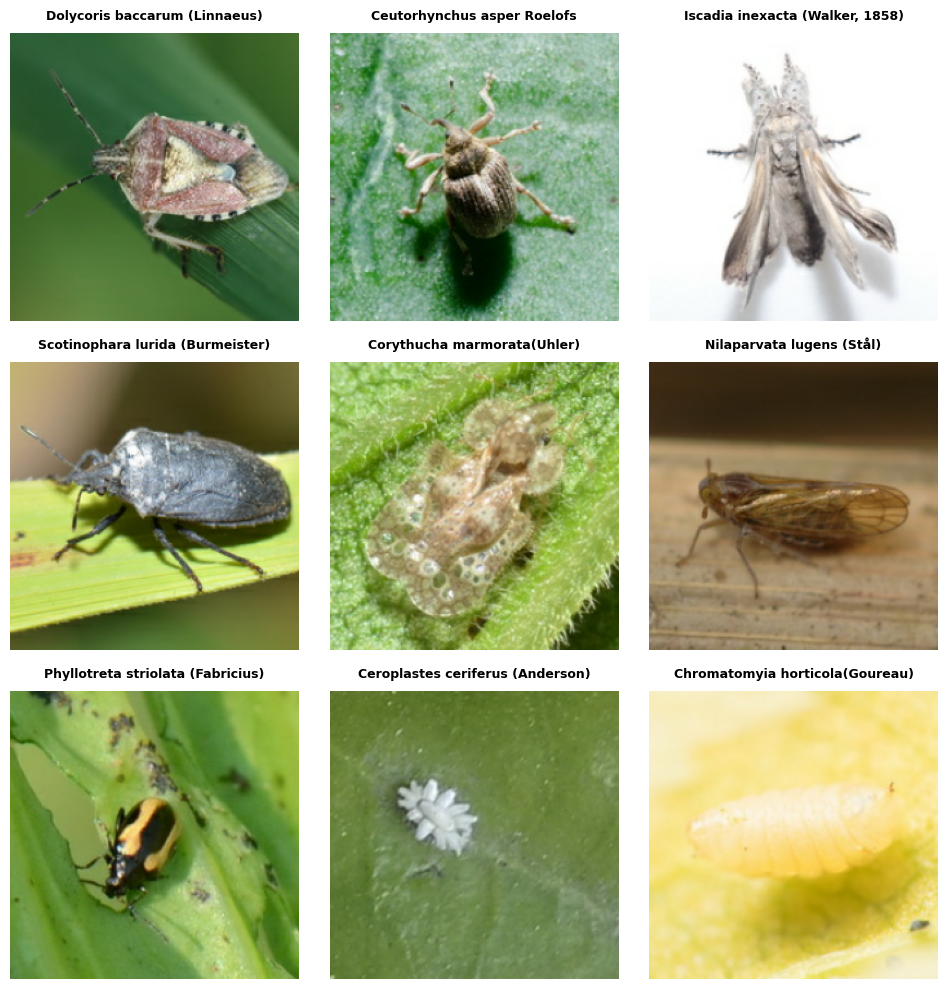

In [254]:
plt.figure(figsize=(10, 10))
for images, labels in test_dataset.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]], fontsize = 9)
    plt.axis("off")


In [276]:
val_batches = tf.data.experimental.cardinality(val_dataset)
test_dataset = val_dataset.take(val_batches // 5)
validation_dataset = val_dataset.skip(val_batches // 5)


In [277]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))


Number of validation batches: 7
Number of test batches: 1


In [333]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)


Usar aumento de datos

In [334]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])


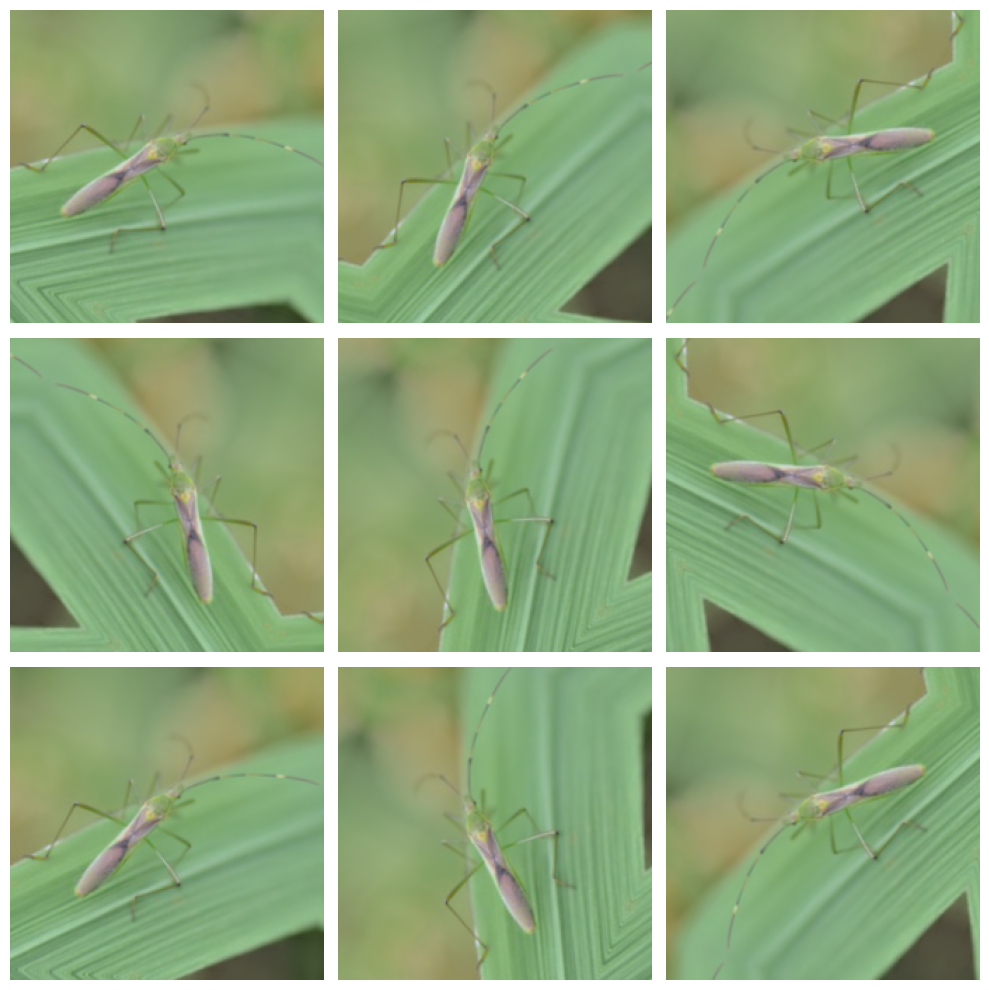

In [280]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')


In [266]:
print(species_count)

{'Aulacophora indica (Gmelin)': 68, 'Bemisia tabaci (Gennadius)': 121, 'Callitettix versicolor (Fabricius)': 126, 'Ceroplastes ceriferus (Anderson)': 78, 'Ceutorhynchus asper Roelofs': 110, 'Chauliops fallax Scott': 54, 'Chilo supperssalis (Walker)': 75, 'Chromatomyia horticola(Goureau)': 92, 'Cicadella viridis (Linnaeus)': 97, 'Cletus punctiger (Dallas)': 136, 'Corythucha ciliata (Say)': 73, 'Corythucha marmorata(Uhler)': 76, 'Dicladispa armigera (Olivier)': 117, 'Diostrombus politus Uhler': 192, 'Dolerus tritici Chu': 63, 'Dolycoris baccarum (Linnaeus)': 66, 'Dryocosmus KuriphilusYasumatsu': 42, 'Empoasca flavescens (Fabricius)': 98, 'Eurydema dominulus (Scopoli)': 121, 'Graphosoma rubrolineata (Westwood)': 95, 'Halyomorpha halys (Stål)': 80, 'Iscadia inexacta (Walker, 1858)': 62, 'Laodelphax striatellus (Fallén)': 48, 'Leptocorisa acuta (Thunberg)': 108, 'Luperomorpha suturalis Chen': 85, 'Lycorma delicatula (White)': 69, 'Maruca testulalis Gryer': 56, 'Nezara viridula (Linnaeus)': 

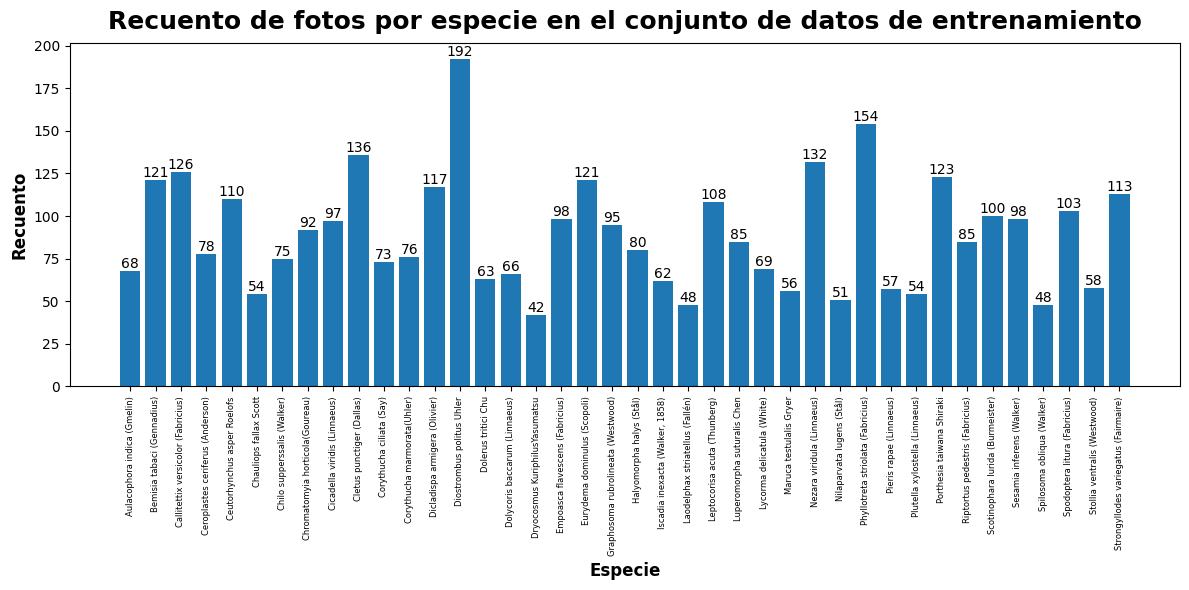

In [197]:
species_count = {species: 0 for species in class_names}

for _, labels in train_dataset:
    for label in labels:
        species_count[class_names[label]] += 1

# Obtén las especies y los recuentos de fotos
species = list(species_count.keys())
counts = list(species_count.values())

# Crea la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Crea el gráfico de barras
bp = ax.bar(species, counts)

# Rota las etiquetas del eje x
ax.set_xticklabels(species, rotation=90, size=6)

# Establece el título y las etiquetas de los ejes
ax.set_title('Recuento de fotos por especie en el conjunto de datos de entrenamiento')
ax.set_xlabel('Especie')
ax.set_ylabel('Recuento')

# Añade las etiquetas de recuento en la parte superior de las barras
for rect in bp:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(height),
            ha='center', va='bottom')

# Muestra el gráfico
plt.tight_layout()
plt.show()

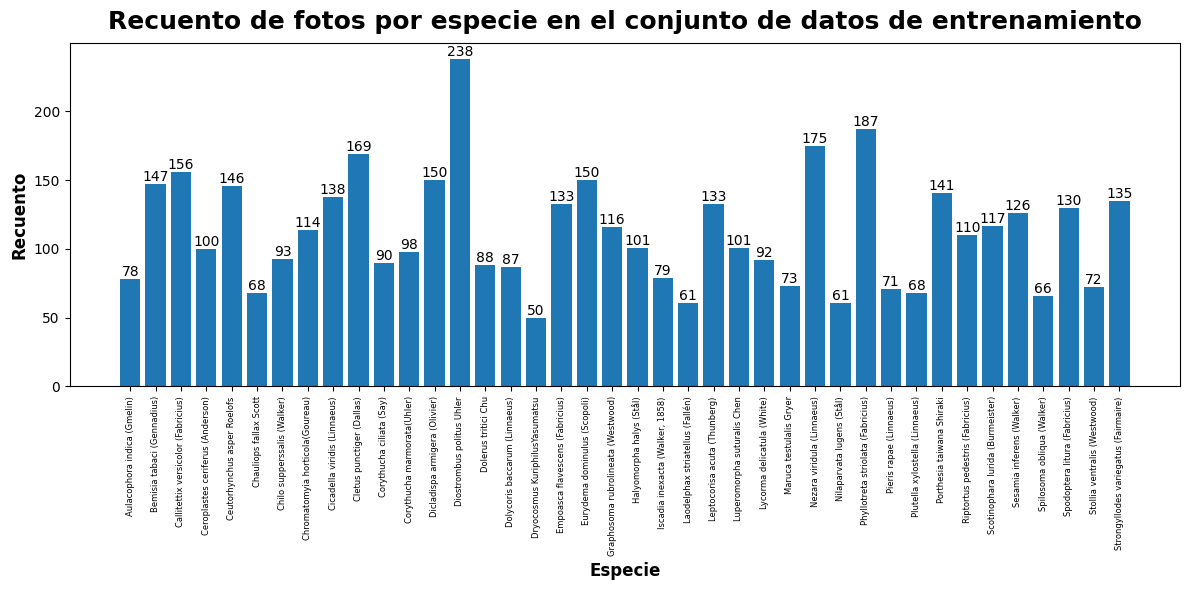

In [268]:
species_count = {species: 0 for species in class_names}

for _, labels in dataset:
    for label in labels:
        species_count[class_names[label]] += 1


# Obtén las especies y los recuentos de fotos
species = list(species_count.keys())
counts = list(species_count.values())

# Crea la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Crea el gráfico de barras
bp = ax.bar(species, counts)

# Rota las etiquetas del eje x
ax.set_xticklabels(species, rotation=90, size=6)

# Establece el título y las etiquetas de los ejes
ax.set_title('Recuento de fotos por especie en el conjunto de datos de entrenamiento')
ax.set_xlabel('Especie')
ax.set_ylabel('Recuento')

# Añade las etiquetas de recuento en la parte superior de las barras
for rect in bp:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(height),
            ha='center', va='bottom')


plt.tight_layout()
plt.show()

In [51]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [52]:
IMG_SHAPE = IMG_SIZE + (3,)
pretrained_base = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
pretrained_base.trainable = False


In [53]:
initial_epochs = 100
model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(species_folders), activation='softmax')
])

Learning rate schedule: 1e-05 to 5e-05 to 1e-05


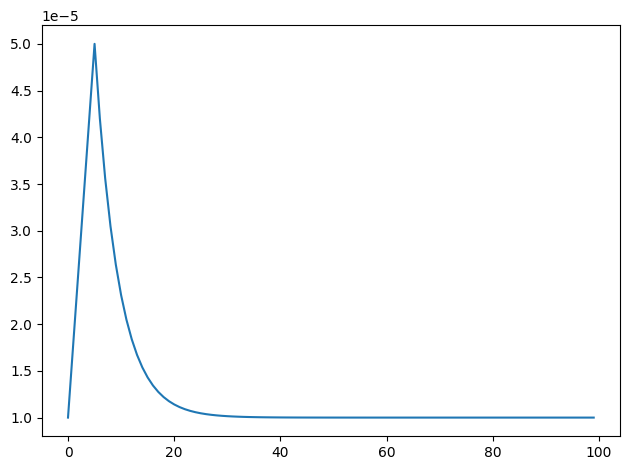

In [54]:
def exponential_lr(epoch,
                   start_lr = 0.00001, min_lr = 0.00001, max_lr = 0.00005,
                   rampup_epochs = 5, sustain_epochs = 0,
                   exp_decay = 0.8):

    def lr(epoch, start_lr, min_lr, max_lr, rampup_epochs, sustain_epochs, exp_decay):
        # linear increase from start to rampup_epochs
        if epoch < rampup_epochs:
            lr = ((max_lr - start_lr) /
                  rampup_epochs * epoch + start_lr)
        # constant max_lr during sustain_epochs
        elif epoch < rampup_epochs + sustain_epochs:
            lr = max_lr
        # exponential decay towards min_lr
        else:
            lr = ((max_lr - min_lr) *
                  exp_decay**(epoch - rampup_epochs - sustain_epochs) +
                  min_lr)
        return lr
    return lr(epoch,
              start_lr,
              min_lr,
              max_lr,
              rampup_epochs,
              sustain_epochs,
              exp_decay)

lr_callback = tf.keras.callbacks.LearningRateScheduler(exponential_lr, verbose=True)

rng = [i for i in range(initial_epochs)]
y = [exponential_lr(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))

In [55]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience = 10,
    min_delta = 0.001,
    restore_best_weights = True,
)

In [58]:
base_learning_rate = 0.0001
model.compile(optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'],
)

In [59]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset,
                    callbacks=[early_stopping],)


Epoch 1/100
28/28 [==============================] - 29s 392ms/step - loss: 6.6480 - sparse_categorical_accuracy: 0.0656 - val_loss: 3.5226 - val_sparse_categorical_accuracy: 0.0766
Epoch 2/100
28/28 [==============================] - 10s 361ms/step - loss: 3.3850 - sparse_categorical_accuracy: 0.0938 - val_loss: 3.2563 - val_sparse_categorical_accuracy: 0.1495
Epoch 3/100
28/28 [==============================] - 10s 357ms/step - loss: 3.1301 - sparse_categorical_accuracy: 0.1722 - val_loss: 2.9773 - val_sparse_categorical_accuracy: 0.1972
Epoch 4/100
28/28 [==============================] - 10s 358ms/step - loss: 2.8853 - sparse_categorical_accuracy: 0.2190 - val_loss: 2.7949 - val_sparse_categorical_accuracy: 0.2425
Epoch 5/100
28/28 [==============================] - 11s 380ms/step - loss: 2.7648 - sparse_categorical_accuracy: 0.2433 - val_loss: 2.6520 - val_sparse_categorical_accuracy: 0.2776
Epoch 6/100
28/28 [==============================] - 10s 368ms/step - loss: 2.5555 - spars

In [246]:
model.save('species_recognition_model_mobilenet_v2_100.h5')

<Axes: >

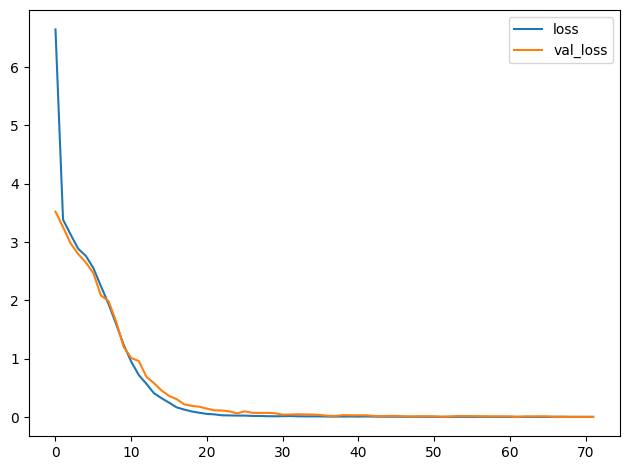

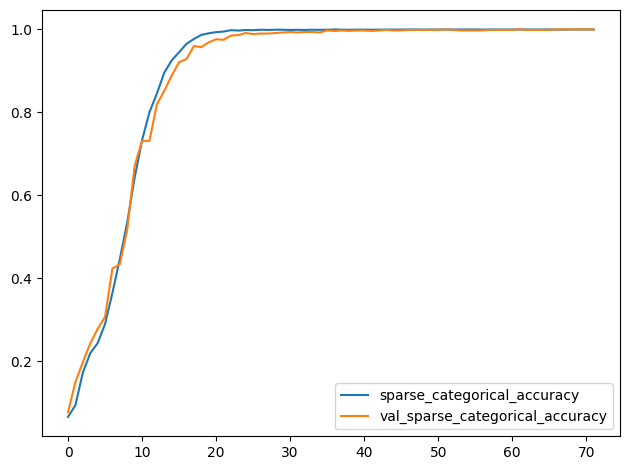

In [203]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:,['loss', 'val_loss']].plot()
history_frame.loc[:,['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot()


In [251]:

batch = iter(test_dataset.unbatch().batch(50))

2/2 [==============================] - 0s 45ms/step


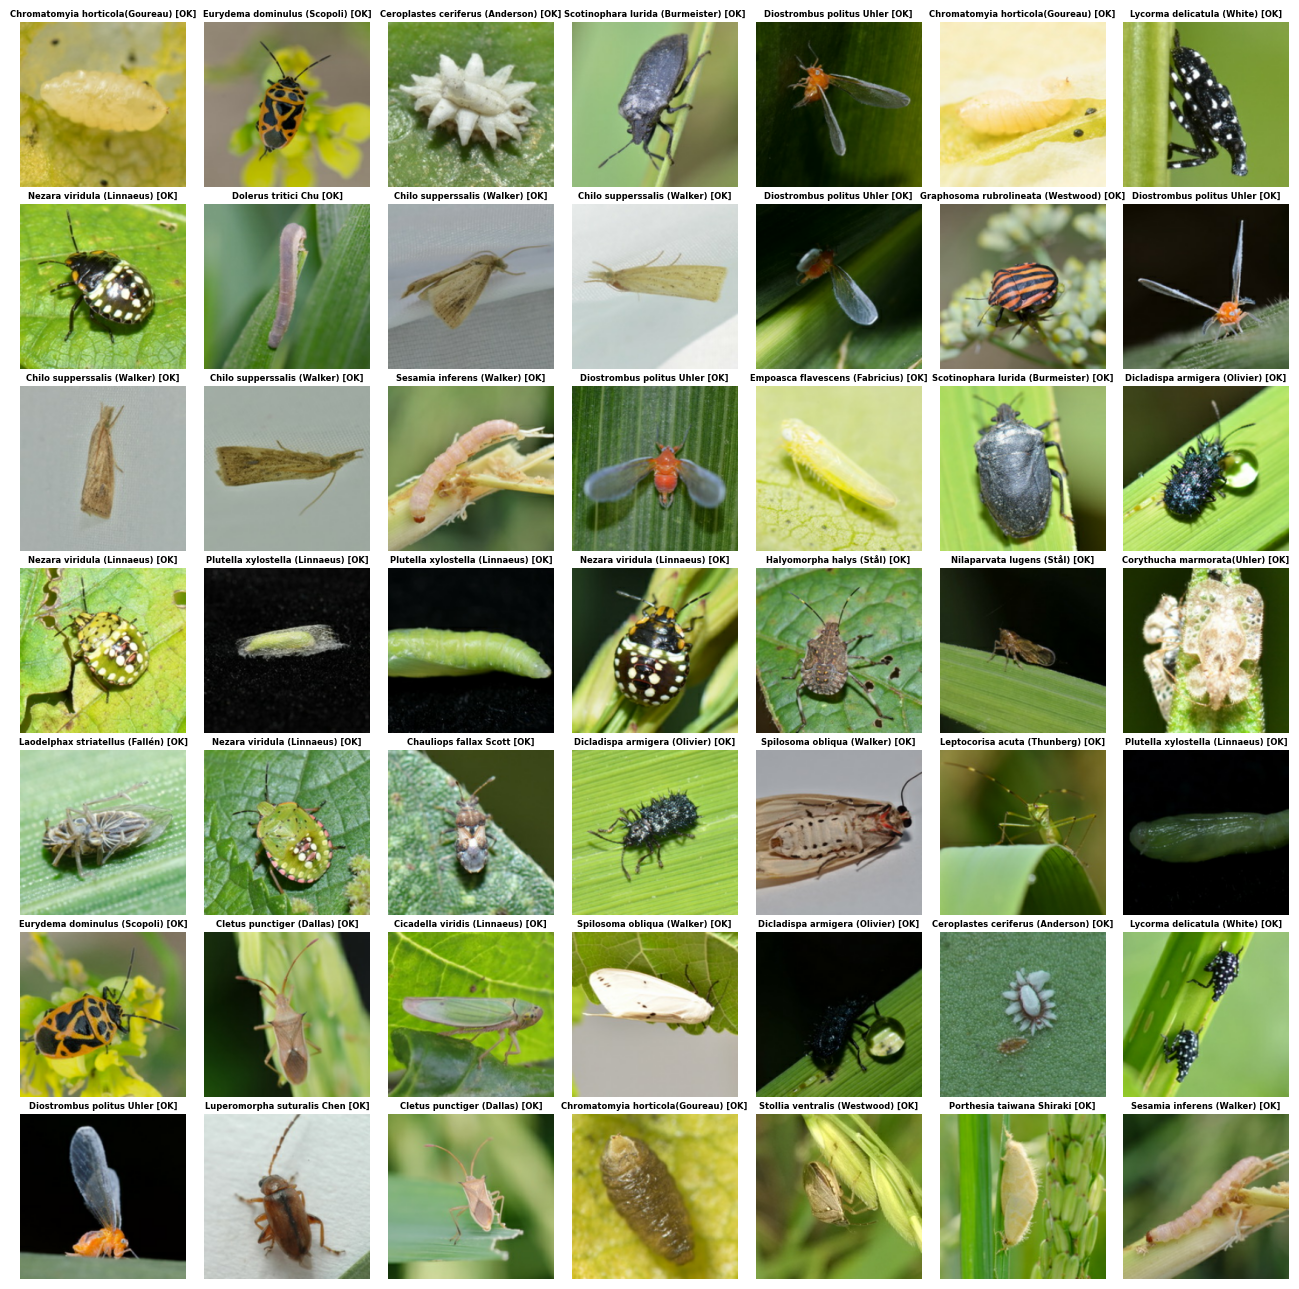

In [252]:
images, labels = next(batch)
probabilities = model.predict(images)
predictions = np.argmax(probabilities, axis=-1)
display_batch_of_images((images, labels), predictions)

In [137]:

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [181]:
def display_confusion_matrix(cmat, score, precision, recall):
    plt.figure(figsize=(15,15))
    ax = plt.gca()
    ax.matshow(cmat, cmap='Reds')
    ax.set_xticks(range(len(class_names)))
    ax.set_xticklabels(class_names, fontdict={'fontsize': 7})
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")
    ax.set_yticks(range(len(class_names)))
    ax.set_yticklabels(class_names, fontdict={'fontsize': 7})
    plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    titlestring = ""
    if score is not None:
        titlestring += 'f1 = {:.3f} '.format(score)
    if precision is not None:
        titlestring += '\nprecision = {:.3f} '.format(precision)
    if recall is not None:
        titlestring += '\nrecall = {:.3f} '.format(recall)
    if len(titlestring) > 0:
        ax.text(101, 1, titlestring, fontdict={'fontsize': 18, 'horizontalalignment':'right', 'verticalalignment':'top', 'color':'#804040'})
    plt.show()
    
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

In [139]:
def count_data_items(filenames):
    # the number of data items is written in the name of the .tfrec
    # files, i.e. flowers00-230.tfrec = 230 data items
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)

In [267]:
true_labels = []
predicted_labels = []

for image, label in test_dataset:
    true_labels.append(label)
    predicted_probs = model.predict(image)  # Realiza la predicción utilizando tu modelo
    predicted_label = np.argmax(predicted_probs, axis=1)
    predicted_labels.append(predicted_label)

true_labels = np.concatenate(true_labels)
predicted_labels = np.concatenate(predicted_labels)
cmat = confusion_matrix(true_labels, predicted_labels)


4/4 [==============================] - 0s 71ms/step


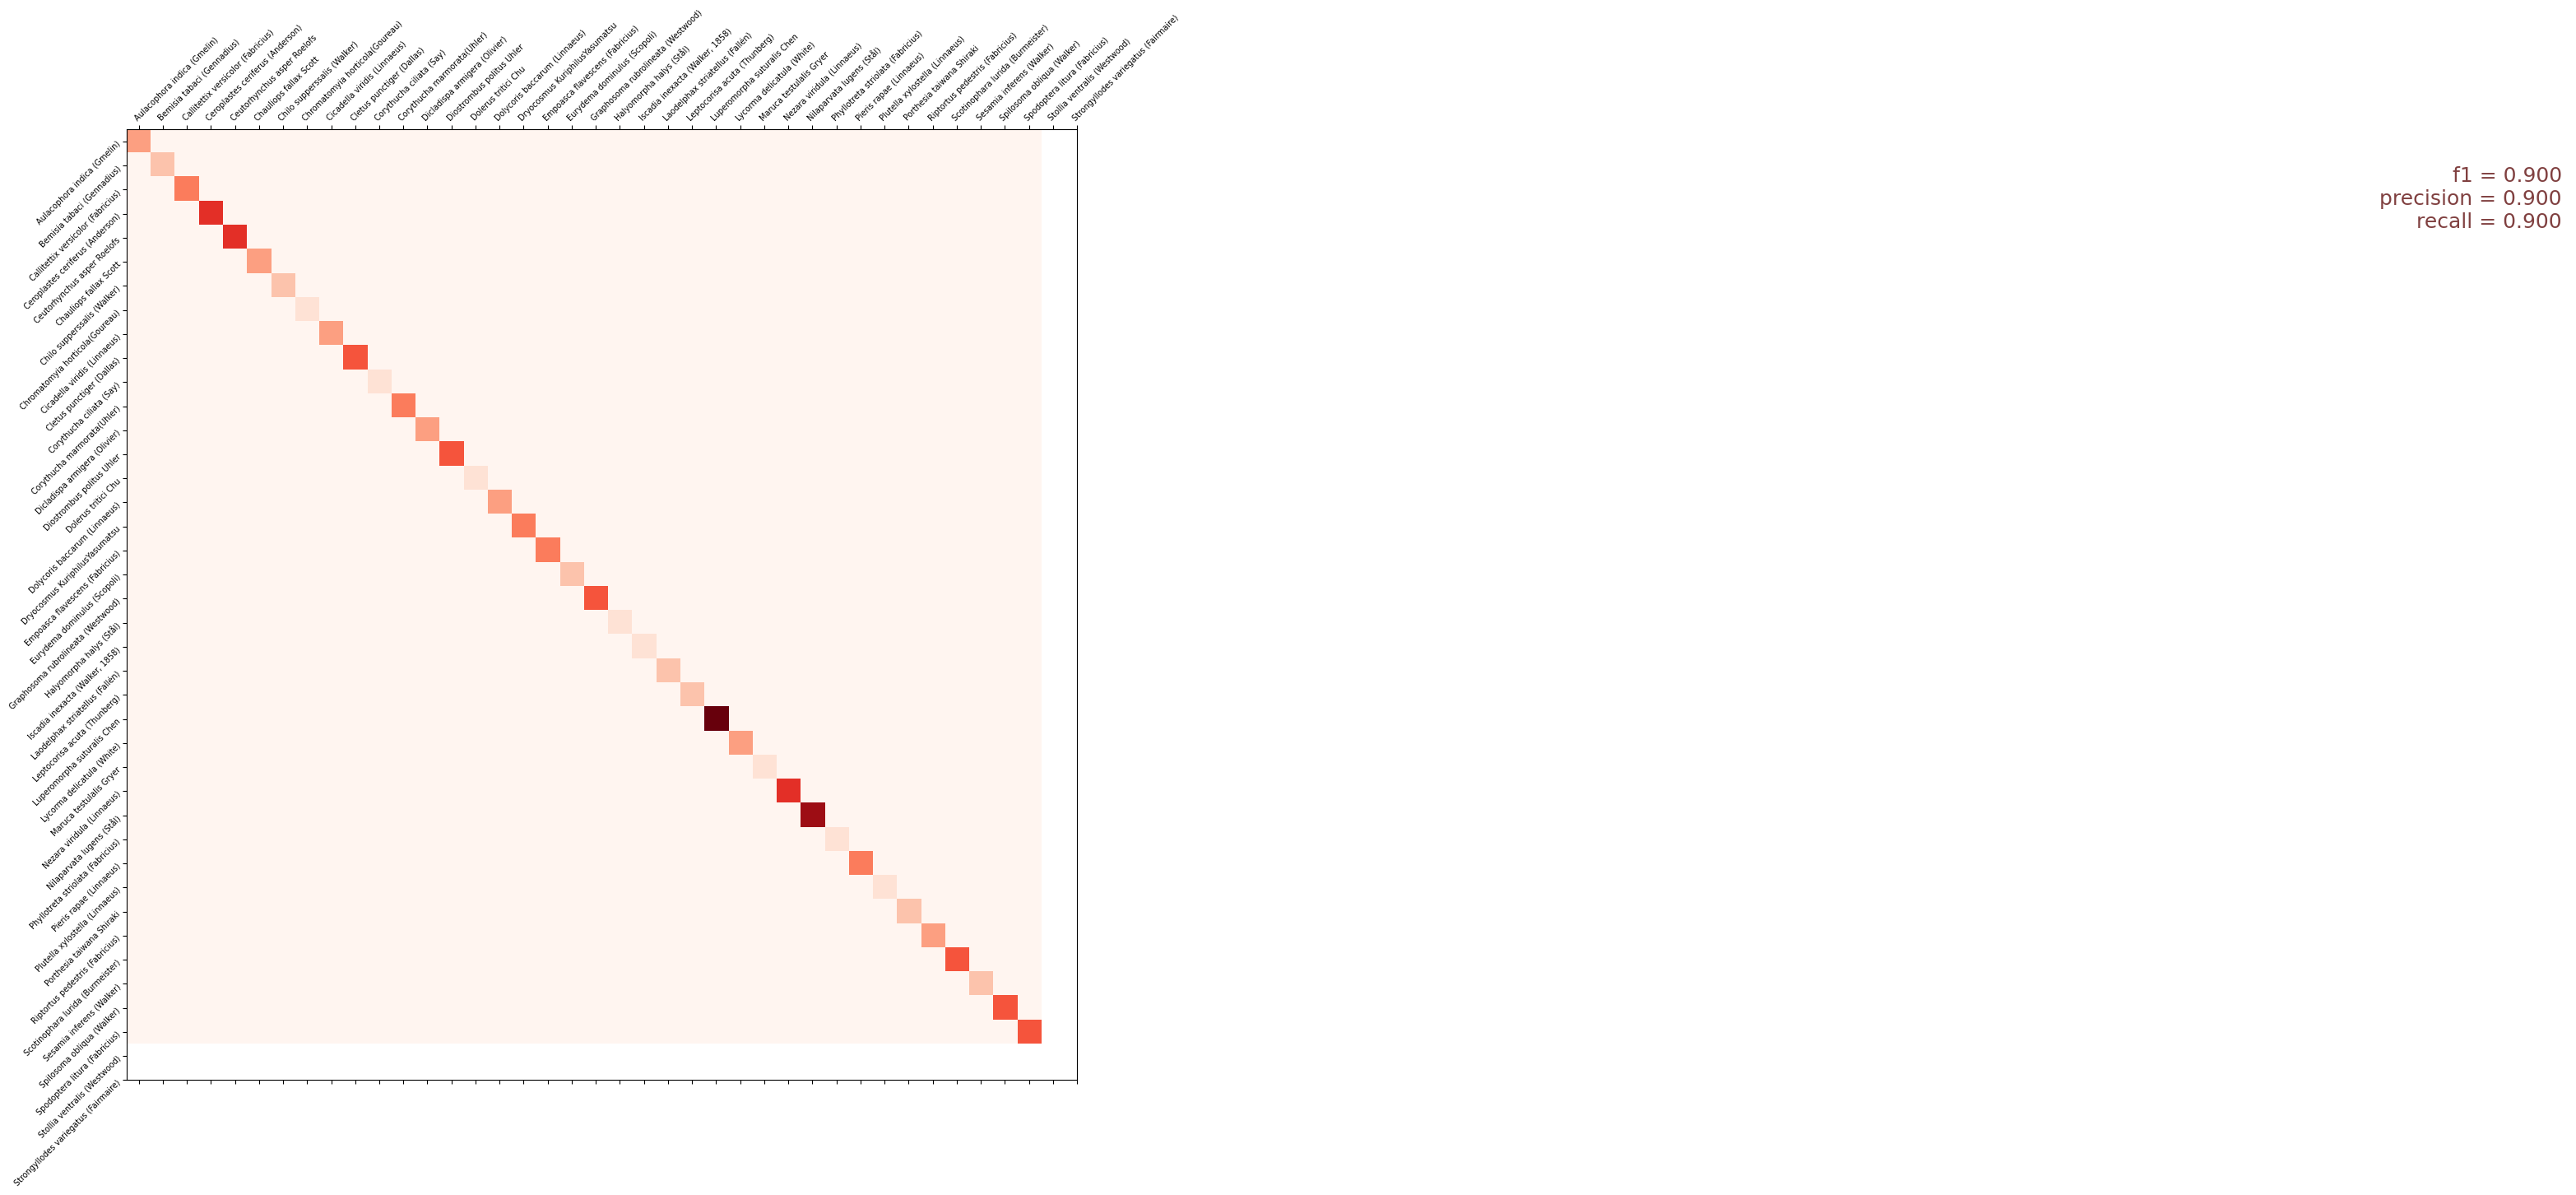

In [204]:
score = f1_score(true_labels, predicted_labels, labels=labels, average='macro')
precision = precision_score(true_labels, predicted_labels, labels=labels, average='macro')
recall = recall_score(true_labels, predicted_labels, labels=labels, average='macro')
display_confusion_matrix(cmat, score, precision, recall)